In [1]:
# дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019).
# Прочитайте csv файл (використовуйте функцію read_csv)
import pandas as pd
url = 'https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019'
path = r'C:\PythonProject\Python_Data_Science\bestsellers with categories.csv'
data = pd.read_csv(path)

In [2]:
# Виведіть перші п'ять рядків (використовується функція head)
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# Виведіть розміри датасету (використовуйте атрибут shape)
data.shape

(550, 7)

In [4]:
# Відповідь: Про скільки книг зберігає дані датасет? 
# про 550

In [5]:
# Для спрощення подальшої роботи давайте трохи підправимо назви змінних. 
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [6]:
# Первинне дослідження даних
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
data.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [7]:
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
# Ні, немає

In [8]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
data.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [9]:
# Відповідь: Які є унікальні жанри?
# унікальні жанри 'Non Fiction' і 'Fiction']

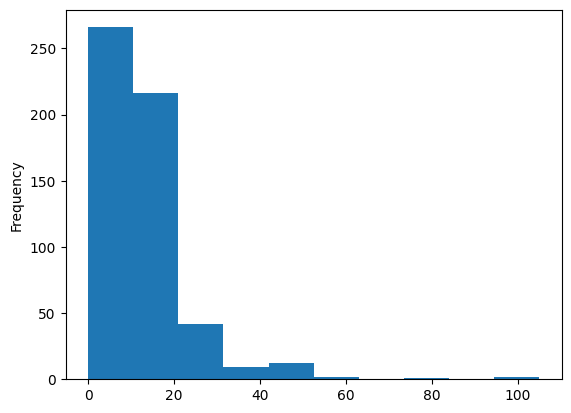

In [11]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import matplotlib.pyplot as plt
data['price'].plot(kind='hist')
plt.show()

In [12]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
def price_array(arr):
    max_price = arr.max()
    min_price = arr.min()
    mean_price = arr.mean()
    med_price = arr.median()
    return print(f'максимальна ціна: {max_price} USD\nмінімальна ціна: {min_price} USD\nсередня ціна: {mean_price} USD\nмедіанна ціна: {med_price} USD')
price_array(data['price'])

максимальна ціна: 105 USD
мінімальна ціна: 0 USD
середня ціна: 13.1 USD
медіанна ціна: 11.0 USD


In [ ]:
# Відповідь: Максимальна ціна?
# максимальна ціна: 105 USD

In [ ]:
# Відповідь: Мінімальна ціна?
# мінімальна ціна: 0 USD

In [ ]:
# Відповідь: Середня ціна?
# середня ціна: 13.1 USD

In [ ]:
# Відповідь: Медіанна ціна?
# медіанна ціна: 11.0 USD

In [13]:
# Пошук та сортування даних
# Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9
data['user_rating'].max()

4.9

In [14]:
# Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52
rating = data.groupby('user_rating').size()
rating[4.9]

52

In [15]:
# Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
data.sort_values('reviews').iloc[-1]

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

In [16]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
# Відповідь: Publication Manual of the American Psychologic...
data_2015 = data[data['year'] == 2015]
data_2015=data_2015.sort_values('reviews')[::-1]
data_2015.sort_values('price').iloc[-1]

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object

In [17]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
data[(data['year'] == 2010) & (data['genre'] == 'Fiction')].shape

(20, 7)

In [18]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
# Відповідь: 1
a=data[(data['year'] == 2010) | (data['year'] == 2011)]
a[a['user_rating'] == 4.9].count()

name           1
author         1
user_rating    1
reviews        1
price          1
year           1
genre          1
dtype: int64

In [19]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
# (використовуйте функцію sort_values).
data_2015_cheap = data[data['year'] == 2015]
data_2015_cheap[data_2015_cheap['price'] < 8 ].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [20]:
# Відповідь: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)
data_2015_cheap.iloc[-1]

name                  Wonder
author         R. J. Palacio
user_rating              4.8
reviews                21625
price                      9
year                    2015
genre                Fiction
Name: 542, dtype: object

In [ ]:
# Агрегування даних та з'єднання таблиць
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
#(використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). 
#Не беріть усі стовпці, виберіть тільки потрібні вам

In [21]:
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
price=data.groupby('genre')
price['price'].agg(['max', 'min'])

,max,min
genre,,
Fiction,82,0
Non Fiction,105,0


In [ ]:
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0

In [ ]:
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105

In [ ]:
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0

In [22]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg,
# для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
df_author = data.groupby('author')
df_author['genre'].agg('count')

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: genre, Length: 248, dtype: int64

In [23]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248
df_author['genre'].agg('count').shape

(248,)

In [24]:
# Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney 
a = df_author['genre'].agg('count')
a.sort_values()

author
Jill Twiss                             1
Patrick Thorpe                         1
Ian K. Smith M.D.                      1
Howard Stern                           1
Hopscotch Girls                        1
                                      ..
American Psychological Association    10
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
Jeff Kinney                           12
Name: genre, Length: 248, dtype: int64

In [25]:
# Відповідь: Скільки книг цього автора? Відповідь: 12

In [26]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції
# groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
df_rating = data.groupby('author')
b = df_rating['user_rating'].agg('mean')
b

author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: user_rating, Length: 248, dtype: float64

In [27]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
b.sort_values()

author
Donna Tartt           3.9
Gillian Flynn         4.0
Muriel Barbery        4.0
Gallup                4.0
Ian K. Smith M.D.     4.1
                     ... 
Lin-Manuel Miranda    4.9
Patrick Thorpe        4.9
Nathan W. Pyle        4.9
Bill Martin Jr.       4.9
Jill Twiss            4.9
Name: user_rating, Length: 248, dtype: float64

In [ ]:
# Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

In [28]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
summary_data = pd.concat([a, b], axis=1)
summary_data

,genre,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [29]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
summary_data.sort_values('genre')

,genre,user_rating
author,,
Jill Twiss,1,4.900000
Patrick Thorpe,1,4.900000
Ian K. Smith M.D.,1,4.100000
Howard Stern,1,4.300000
Hopscotch Girls,1,4.800000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [ ]:
# Відповідь: Який автор перший у списку? Jill Twiss

<Axes: xlabel='price', ylabel='user_rating'>

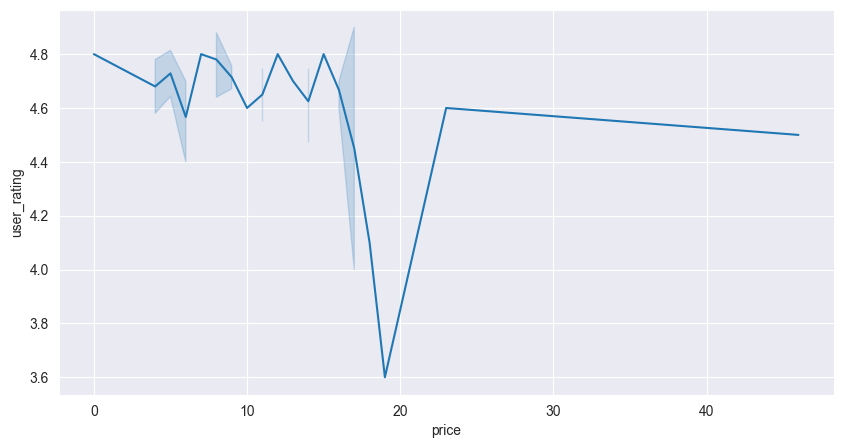

In [50]:
import seaborn as sns
%matplotlib inline

my_data=data
my_data_2015 = data[data['year'] == 2015]
plt.figure(figsize=(10,5))
sns.lineplot(x='price', y='user_rating', data=my_data_2015)

<Axes: xlabel='year', ylabel='price'>

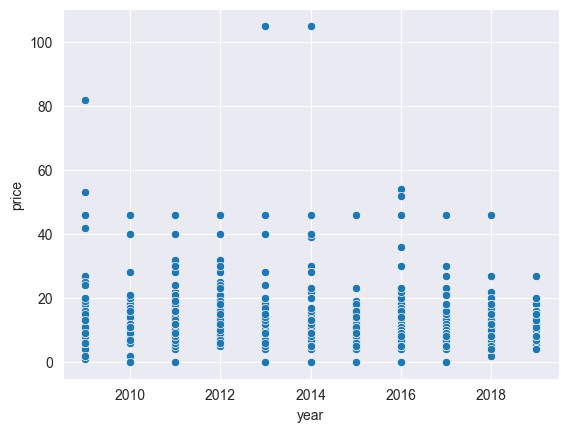

In [36]:
sns.set_style("darkgrid")
sns.scatterplot(x='year', y='price', data=my_data)

<Axes: xlabel='user_rating', ylabel='reviews'>

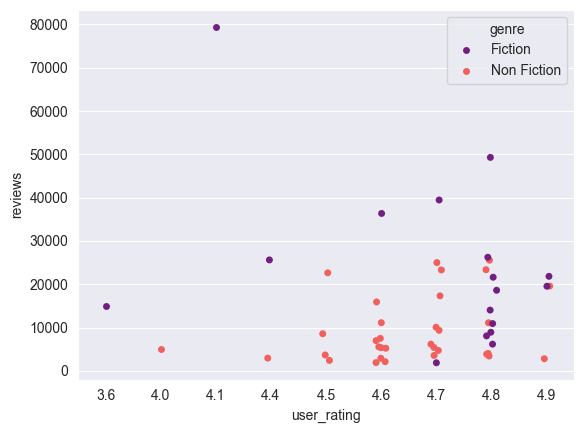

In [58]:
sns.stripplot(x='user_rating', y='reviews', data=my_data_2015, hue='genre', palette='magma')

<Axes: xlabel='genre', ylabel='price'>

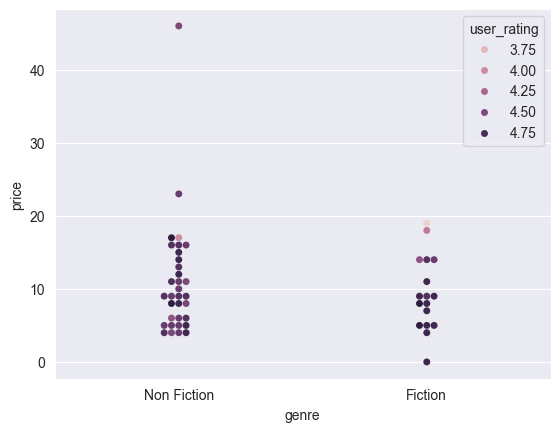

In [60]:
sns.swarmplot(x='genre', y='price', data=my_data_2015, hue='user_rating')

<Axes: xlabel='genre', ylabel='count'>

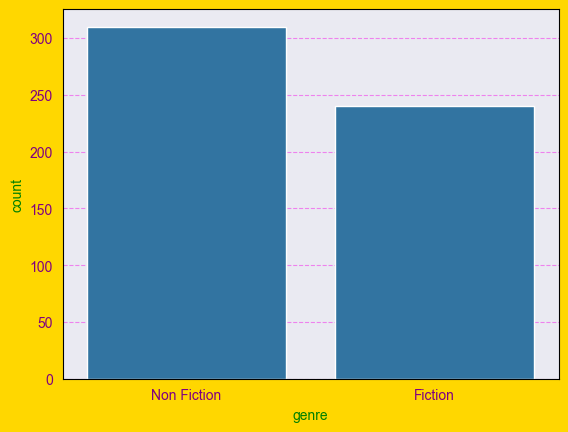

In [75]:
sns.set_style({'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': 'green',
 'figure.facecolor': 'gold',
 'grid.color': 'violet',
 'grid.linestyle': '--',
 'xtick.color': 'purple',
 'ytick.color': 'purple',
 'image.cmap': 'rocket'})
sns.countplot(x="genre", data=my_data)